# 图像卷积 

二维互相关运算

In [1]:
import torch
import torch.nn as nn

In [26]:
def corr2d(X,K):
    """卷积运算/二维互相关运算
    Args:
    X相当于是输入图像
    K是卷积核
    Y是输出结果
    """
    h,w=K.shape
    Y=torch.zeros((X.shape[0]-h+1,X.shape[1]-w+1))
    # 不考虑padding stride等
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j]=(X[i:i+h,j:j+w]*K).sum()
#             print(f"i={i}.j={j}时，结果为{(X[i:i+h,j:j+w]*K)}")
            # 往后看h行，往后看w列    
    return Y

验证一下这个二维互相关运算的输出

注意，这里X中一块和核相乘的时候，使用的是哈达玛积，然后做求和。(打印输出看看，确实是哈达玛积,默认矩阵使用\*进行乘积时，就是两个矩阵对应位置相乘)

关于哈达玛积，参考：[哈达玛积 Hadamard Product](https://zhuanlan.zhihu.com/p/161464118)

In [6]:
X=torch.tensor([[0,1,2],[3,4,5],[6,7,8]])
K=torch.tensor([[0,1],[2,3]])
corr2d(X,K)

i=0.j=0时，结果为tensor([[ 0,  1],
        [ 6, 12]])
i=0.j=1时，结果为tensor([[ 0,  2],
        [ 8, 15]])
i=1.j=0时，结果为tensor([[ 0,  4],
        [12, 21]])
i=1.j=1时，结果为tensor([[ 0,  5],
        [14, 24]])


tensor([[19., 25.],
        [37., 43.]])

定义好了卷积算子，其实就可以定义一下Conv2d，二维卷积层了

In [7]:
class Conv2d(nn.Module):
    def __init__(self,kernel_size):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(kernel_size))
        self.bias=nn.Parameter(torch.zeros(1))
        
    def forward(self,x):
        return corr2d(x,self.weight)+self.bias

## 边缘检测

卷积层的一个简单应用：检测图像中不同颜色的边缘。

更准确的说，这不是卷积层的作用，是卷积这个操作子的作用/特性

In [8]:
X=torch.ones((6,8))
X[:,2:6]=0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

上面创建了一个假图，两侧是白色，中间是黑色

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
X.tolist()

[[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]]

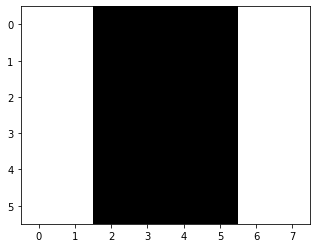

In [23]:
plt.imshow(X.tolist(),cmap="gray")

In [24]:
K=torch.tensor([[1.0,-1.0]])

In [27]:
Y= corr2d(X,K)

In [28]:
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

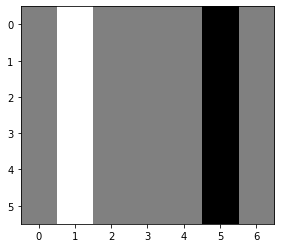

In [29]:
plt.imshow(Y.tolist(),cmap="gray")

这样就看出边缘了，左侧是白到黑的边缘，右侧是黑到白的边缘。

> 另外，通过上面的计算可以看出来，这个卷积核K目前只能检测垂直边缘，不垂直的看不出来

In [30]:
Y2= corr2d(X.t(),K)

In [31]:
Y2

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

可以看到，把X转置，就是把图像边缘变成横的，这个卷积核就检测不到了。但是考虑换一个卷积核呢。自己试试

In [32]:
K2=torch.tensor([[1.0],[-1.0]])
# 之前是1X2，现在改成2X1 试试

In [33]:
Y3=corr2d(X.t(),K2)

In [34]:
Y3

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [-1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.]])

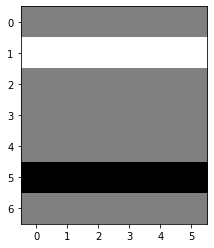

In [35]:
plt.imshow(Y3.tolist(),cmap="gray")

这不就转过来了？？？

## 学习由`X`生成`Y`的卷积核

+ 上面都是给定输入、卷积核，计算输出；
+ 但是深度学习更需要的其实是，给定输入和输出，去算卷积核里的参数

In [37]:
conv2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)
# 没有使用自己写的那个，因为那个双层循环，应该低效
 
X=X.reshape((1,1,6,8))
Y=Y.reshape((1,1,6,7)) # 列上的卷积核size大于1，所以应该是8-2+1=7 行上是1，所以不变

for i in range(10):
    Y_hat=conv2d(X)
    l=(Y_hat-Y)**2
    conv2d.zero_grad()
    l.sum().backward()
    lr=3e-2 # 0.03 
    conv2d.weight.data[:]-=lr*conv2d.weight.grad
    if(i+1)%2==0: #每两轮输出一次结果
        print(f"batch {i+1},loss {l.sum():.3f}")

batch 2,loss 9.165
batch 4,loss 2.131
batch 6,loss 0.601
batch 8,loss 0.200
batch 10,loss 0.074


所以看看这个Conv2d的参数要求，可以发现，
+ 它并不关心输入数据的维度，因为卷积层的参数量和输入数据大小无关，只和卷积核大小，以及输入的channel（也会影响卷积操作次数），输出的channel有关。
+ 这就是卷积诞生的意义，参数量/权重的维度和输入数据无关，大大减小了参数量（在输入数据维度很高的时候），同时保留了空间结构

In [38]:
conv2d.weight.data 

tensor([[[[ 0.9594, -1.0137]]]])

可以看到，训练10轮后，已经很接近我们刚刚定义的核[[1,-1]]

> 可以把那个多余的无意义的轴给去掉，但是这里也可以看到，其实在真实计算的时候，会有多余的两个轴，就是之前讲课时候，去掉的`i,j`轴。

In [39]:
conv2d.weight.data.reshape(1,2)

tensor([[ 0.9594, -1.0137]])

In [40]:
torch.squeeze(conv2d.weight.data)

tensor([ 0.9594, -1.0137])

当然，也能直接用squeeze去掉所有轴上维度为1的轴